In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 

housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
real_estate = pd.read_csv('Ames Real Estate Data.csv', index_col=0)
real_estate_with_coordinates=pd.read_csv("real_estate_with_coordinates.csv")

C:\Users\jorge\AppData\Local\Temp\ipykernel_26456\3354025517.py:6: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate = pd.read_csv('Ames Real Estate Data.csv', index_col=0)
C:\Users\jorge\AppData\Local\Temp\ipykernel_26456\3354025517.py:7: DtypeWarning: Columns (35,39,80,86) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_with_coordinates=pd.read_csv("real_estate_with_coordinates.csv")


In [2]:
real_estate_columns_to_keep = ['GeoRefNo','Prop_Addr', 'MA_Zip1', 'latitude', 'longitude']
housing_coordinates = pd.merge(housing, real_estate_with_coordinates[real_estate_columns_to_keep], left_on='PID', right_on='GeoRefNo', how='left')

In [3]:
housing_coordinates.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [4]:
housing_coordinates.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GeoRefNo,MA_Zip1,latitude,longitude
count,2.624000e+03,2624.000000,2624.000000,2624.000000,2158.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,...,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2.604000e+03,2601.000000,2542.000000,2542.000000
mean,7.150624e+08,1482.796494,177875.010671,57.869665,68.363763,10089.203125,6.040015,5.617378,1970.320122,1983.696265,...,2.469131,16.343750,1.634146,48.066692,6.149009,2007.839558,7.140050e+08,50124.058055,42.034360,-93.642567
std,1.886760e+08,488.843164,75776.355321,43.086422,22.865792,8079.419490,1.374680,1.120265,29.675273,20.492254,...,25.082962,56.794182,30.084611,494.610859,2.666688,1.314666,1.886463e+08,4062.134058,0.018151,0.026004
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,5.263011e+08,783.000000,41.986495,-93.692701
25%,5.313630e+08,1107.000000,129887.500000,20.000000,57.000000,7386.000000,5.000000,5.000000,1953.000000,1965.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,5.284901e+08,50010.000000,42.022136,-93.661011
50%,5.354551e+08,1432.000000,159000.000000,50.000000,68.000000,9368.500000,6.000000,5.000000,1972.000000,1992.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,5.354540e+08,50010.000000,42.034758,-93.640393
75%,9.071811e+08,1728.000000,208925.000000,70.000000,80.000000,11475.750000,7.000000,6.000000,1999.000000,2003.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,9.071800e+08,50014.000000,42.048952,-93.621696
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,1.007100e+09,99516.000000,42.063342,-93.578327


In [5]:
housing_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2624 entries, 0 to 2623
Data columns (total 86 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2624 non-null   int64  
 1   GrLivArea      2624 non-null   int64  
 2   SalePrice      2624 non-null   int64  
 3   MSSubClass     2624 non-null   int64  
 4   MSZoning       2624 non-null   object 
 5   LotFrontage    2158 non-null   float64
 6   LotArea        2624 non-null   int64  
 7   Street         2624 non-null   object 
 8   Alley          172 non-null    object 
 9   LotShape       2624 non-null   object 
 10  LandContour    2624 non-null   object 
 11  Utilities      2624 non-null   object 
 12  LotConfig      2624 non-null   object 
 13  LandSlope      2624 non-null   object 
 14  Neighborhood   2624 non-null   object 
 15  Condition1     2624 non-null   object 
 16  Condition2     2624 non-null   object 
 17  BldgType       2624 non-null   object 
 18  HouseSty

<AxesSubplot:>

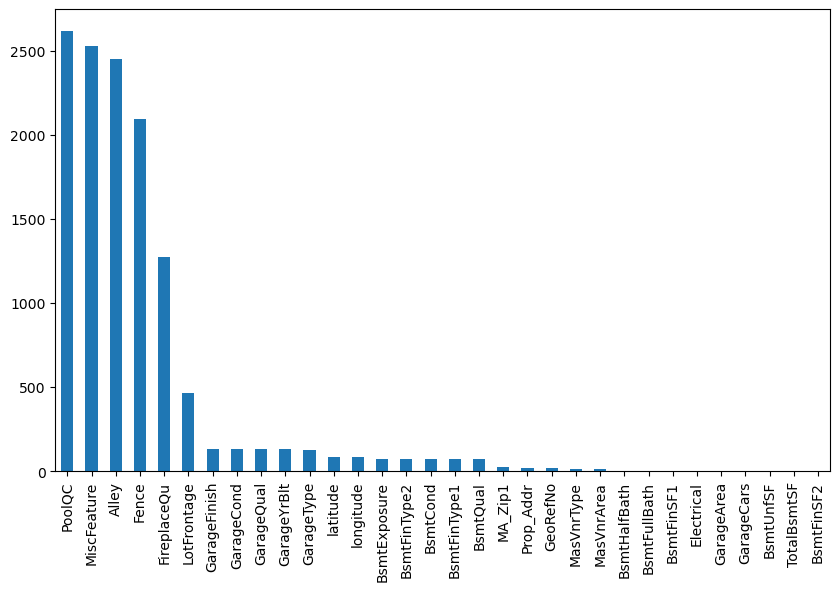

In [6]:
missing_values=housing_coordinates.isna().sum()
missing_values_features=missing_values[missing_values>0].sort_values(ascending=False)

missing_values_features.plot(kind='bar', figsize=(10,6))

In [7]:
#Handling missing features

missing_categorical = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageCond','GarageQual',
               'GarageFinish', 'GarageType', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
              'BsmtExposure']

housing_coordinates[missing_categorical]=housing_coordinates[missing_categorical].fillna('missing')

missing_numerical = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']
housing_coordinates[missing_numerical] = housing_coordinates[missing_numerical].fillna(0)



In [8]:
mode_electrical = housing_coordinates['Electrical'].mode()[0]
housing_coordinates['Electrical'].fillna(mode_electrical, inplace=True)

mode_garagecars = housing_coordinates['GarageCars'].mode()[0]
housing_coordinates['GarageCars'].fillna(mode_garagecars, inplace=True)

mode_bsmthalfbath = housing_coordinates['BsmtHalfBath'].mode()[0]
housing_coordinates['BsmtHalfBath'].fillna(mode_bsmthalfbath, inplace=True)

mode_bsmtfullbath = housing_coordinates['BsmtFullBath'].mode()[0]
housing_coordinates['BsmtFullBath'].fillna(mode_bsmtfullbath, inplace=True)

mean_totalbsmtsf = housing_coordinates['TotalBsmtSF'].mean()
housing_coordinates['TotalBsmtSF'].fillna(mean_totalbsmtsf, inplace=True)

mean_bsmtunfsf = housing_coordinates['BsmtUnfSF'].mean()
housing_coordinates['BsmtUnfSF'].fillna(mean_bsmtunfsf, inplace=True)

mean_garagearea = housing_coordinates['GarageArea'].mean()
housing_coordinates['GarageArea'].fillna(mean_garagearea, inplace=True)

mean_lotfrontage = housing_coordinates['LotFrontage'].mean()
housing_coordinates['LotFrontage'].fillna(mean_lotfrontage, inplace=True)


#fill with '0' if no Garage present or fill housing['YearBuilt']
housing_coordinates['GarageYrBlt'] = housing_coordinates['GarageYrBlt'].fillna(0)

In [9]:
#Creating new features

housing_coordinates['Age'] = housing_coordinates['YrSold']-housing_coordinates['YearBuilt']

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else: # months 12, 1, 2
        return 'Winter'

housing_coordinates['Season'] = housing_coordinates['MoSold'].apply(get_season)

housing_coordinates['TotalSF'] = housing_coordinates['GrLivArea'] + housing_coordinates['TotalBsmtSF']

In [10]:
import numpy as np

# Coordinates of Iowa State University
isu_latitude = 42.0239
isu_longitude = -93.6476

# Function to calculate Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in miles
    radius = 3958.8
    
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # Differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Calculate the distance
    distance = radius * c
    return distance

# Calculate distance for each property address
housing_coordinates['DistanceToISU'] = housing_coordinates.apply(lambda row: haversine(row['latitude'], row['longitude'], isu_latitude, isu_longitude), axis=1)



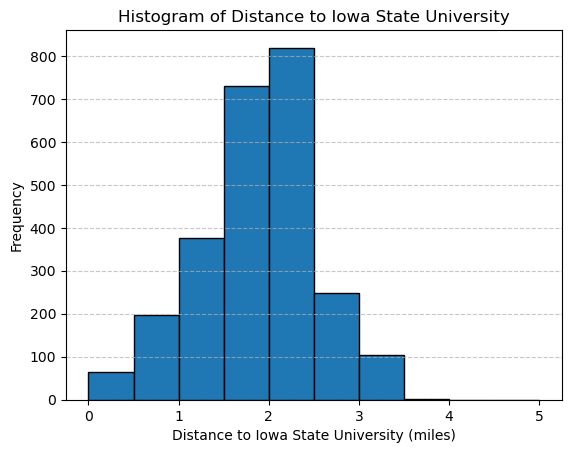

In [11]:
import matplotlib.pyplot as plt

plt.hist(housing_coordinates['DistanceToISU'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], edgecolor='k')  # Adjust the bin edges as needed
plt.xlabel('Distance to Iowa State University (miles)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance to Iowa State University')
plt.xticks(range(6))  # Set the x-axis ticks to match the bins
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:

# Define the bin edges - float('inf')
bin_edges = [0, 1, 2, 3, 4, 20]  # The last bin is for distances >= 4 miles

# Define the bin labels
bin_miles_under = ['1', '2', '3', '4', '5']

# Use pd.cut to create a new column 'DistanceCategory'
housing_coordinates['DistanceCategory'] = pd.cut(housing_coordinates['DistanceToISU'], bins=bin_edges, labels=bin_miles_under)
#housing_coordinates['DistanceCategory'] = housing_coordinates['DistanceCategory'].astype(int)

# Fill NaN in 'DistanceToISU' with the mean
mean_distance = housing_coordinates['DistanceToISU'].mean()
housing_coordinates['DistanceToISU'].fillna(mean_distance, inplace=True)

# Get new categories from 'DistanceToISU' after rounding and converting to int
new_categories = housing_coordinates['DistanceToISU'].round().astype(int).unique()

# Add new categories to 'DistanceCategory'
housing_coordinates['DistanceCategory'] = housing_coordinates['DistanceCategory'].cat.add_categories(new_categories)

# Now fill NaN values
housing_coordinates['DistanceCategory'].fillna(housing_coordinates['DistanceToISU'].round().astype(int), inplace=True)


In [13]:
housing_coordinates.drop(columns=['PID', 'GeoRefNo', 'Prop_Addr', 'MA_Zip1'], inplace=True)

<AxesSubplot:>

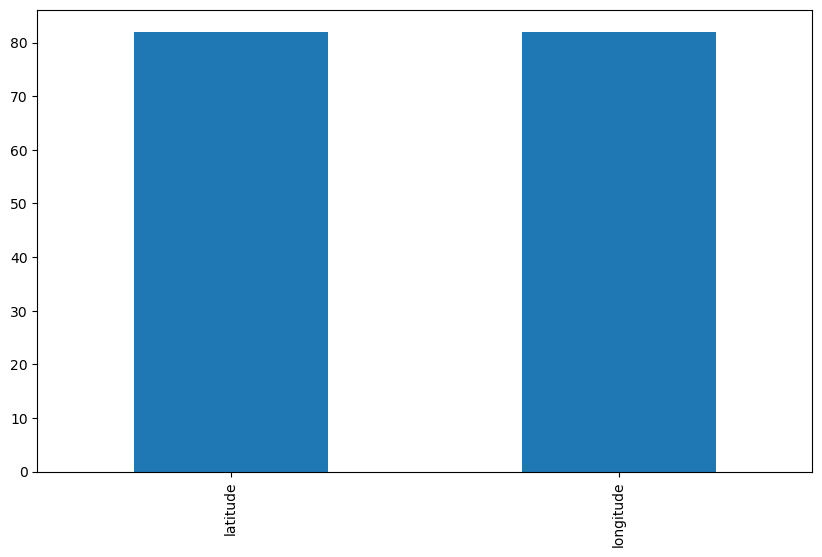

In [14]:
missing_values=housing_coordinates.isna().sum()
missing_values_features=missing_values[missing_values>0].sort_values(ascending=False)

missing_values_features.plot(kind='bar', figsize=(10,6))

In [15]:
housing_coordinates = housing_coordinates.drop_duplicates()
# Calculate the mean of the 'latitude' and 'longitude' columns
mean_latitude = housing_coordinates['latitude'].mean()
mean_longitude = housing_coordinates['longitude'].mean()

# Replace missing values in 'latitude' and 'longitude' columns with their respective means
housing_coordinates['latitude'].fillna(mean_latitude, inplace=True)
housing_coordinates['longitude'].fillna(mean_longitude, inplace=True)

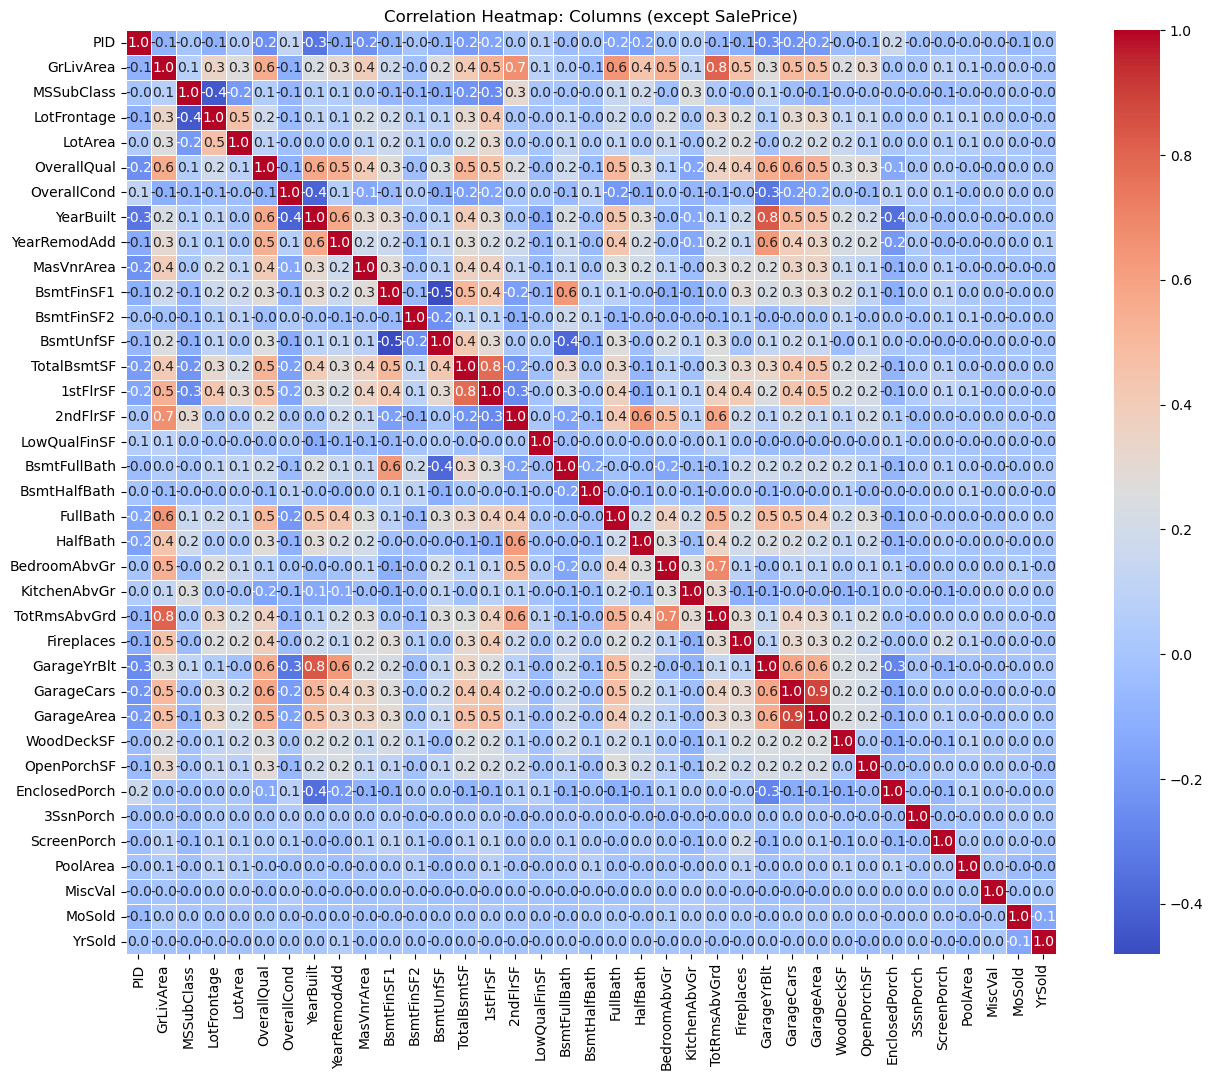

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'SalePrice' column from the dataset
housing_without_saleprice = housing.drop(columns=['SalePrice'])

# Calculate the correlation matrix
corr_matrix = housing_without_saleprice.corr()

# Choose a larger figure size
plt.figure(figsize=(15, 12))

# Choose a colormap that enhances visibility
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a heatmap
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".1f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap: Columns (except SalePrice)')

# Show the plot
plt.show()


In [17]:
#Debateable features: YrSold, Utilities

#28 - differences: PavedDrive, YrSold, Utilities
Nominal = ['Alley','BldgType','CentralAir','Condition1','Condition2','Electrical','Exterior1st','Exterior2nd','Fence',
           'Foundation','GarageType','Heating','HouseStyle','LandContour','LotConfig','MSSubClass','MSZoning',
           'MasVnrType','MiscFeature','MoSold','Neighborhood','PavedDrive','RoofMatl','RoofStyle','SaleCondition',
           'SaleType','Street','YrSold', 'Season']

#18 - differences: Utilities
Ordinal = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC']

#38 - differences: YrSold, TotalSF, YearsSinceRemod, DistanceToISU, longitude, latitude
Numerical = ['GrLivArea','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
             'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'Age'
             'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
             'ScreenPorch','PoolArea','MiscVal', 'TotalSF', 'DistanceToISU', 'longitude', 'latitude']




In [18]:
#Create dataframe by mapping ordinal features and dummifying nominal features. For lasso models, nominal features are not
#dropped at all because lasso applies an L1 regularization penalty which handles multicollinearity and reduce overfitting.
#The L1 penalty shrinks coefficients towards 0, effectively performing feature selection. So it's ok to include all dummy
#variables.

import pandas as pd


ordinal_mappings = {
    'BsmtCond': {'missing': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtExposure': {'missing': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'missing': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'missing': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}, 
    'BsmtQual': {'missing': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
    'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
    'ExterQual': {'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
    'FireplaceQu': {'missing': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
    'Functional': {'Sal':1, 'Maj2':2, 'Maj1':3 , 'Mod':4 ,'Min2':5 , 'Min1':6 ,'Typ':7}, 
    'GarageCond': {'missing': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, 
    'GarageFinish': {'missing': 0, 'Unf':1, 'RFn':2, 'Fin':3}, 
    'GarageQual': {'missing': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }, 
    'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }, 
    'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 }, 
    'LandSlope': {'Gtl':1, 'Mod':2, 'Sev':3}, 
    'LotShape': {'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4},
    'PavedDrive': {'N':1, 'P':2, 'Y':3}, 
    'PoolQC': {'missing': 0, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Utilities': {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
    
    
}

# Map ordinal variables
for col, mapping in ordinal_mappings.items():
    if col in housing_coordinates.columns:
        housing_coordinates[col] = housing_coordinates[col].map(mapping)

# Make a copy of the original DataFrame
housing_coordinates_encoded = housing_coordinates.copy()

# One-hot encode nominal variables
housing_coordinates_encoded_dropfirst = pd.get_dummies(housing_coordinates_encoded, columns=Nominal, drop_first=True)
housing_coordinates_encoded = pd.get_dummies(housing_coordinates_encoded, columns=Nominal, drop_first=False)



In [19]:
housing_coordinates_encoded.dtypes.unique()

array([dtype('int64'), dtype('float64'),
       CategoricalDtype(categories=['1', '2', '3', '4', '5', 0, 1, 2, 3, 4], ordered=True),
       dtype('uint8')], dtype=object)

In [20]:
for col in housing_coordinates_encoded.columns:
    if str(housing_coordinates_encoded[col].dtype) == 'category':
        print(f"Column: {col}, Unique Values: {housing_coordinates_encoded[col].unique()}")


Column: DistanceCategory, Unique Values: ['1', '2', '3', '4', 2]
Categories (10, object): ['1' < '2' < '3' < '4' ... 1 < 2 < 3 < 4]


In [21]:
# Convert the 'DistanceCategory' column to integers
housing_coordinates_encoded['DistanceCategory'] = housing_coordinates_encoded['DistanceCategory'].astype(int)

# Check the unique values again
print(housing_coordinates_encoded['DistanceCategory'].unique())


[1 2 3 4]


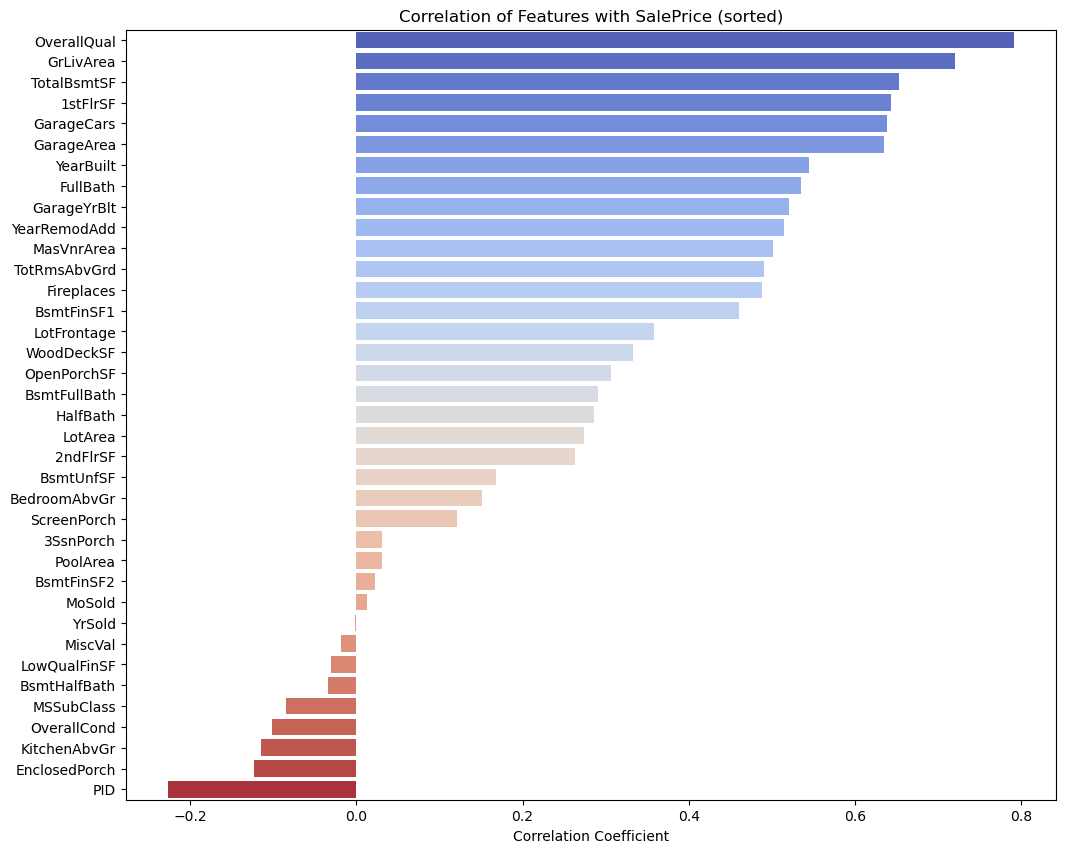

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = housing.corr()

# Get the correlation of all features with 'SalePrice', sort them, and drop 'SalePrice'
sorted_corrs = corr_matrix['SalePrice'].sort_values(ascending=False).drop('SalePrice')

# Plot the sorted correlations
plt.figure(figsize=(12, 10))
sns.barplot(y=sorted_corrs.index, x=sorted_corrs.values, palette='coolwarm')

plt.title('Correlation of Features with SalePrice (sorted)')
plt.xlabel('Correlation Coefficient')
plt.show()


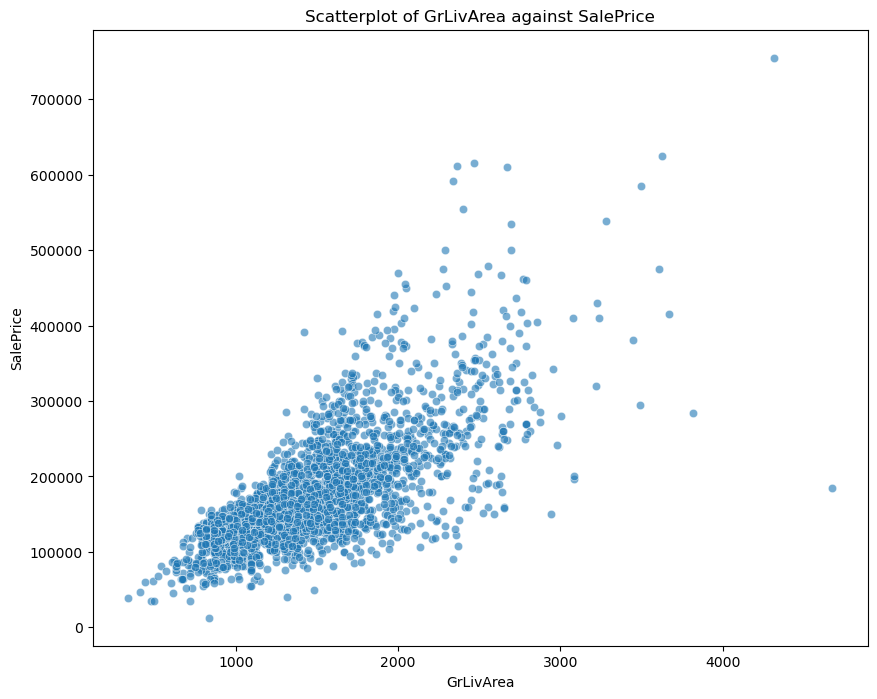

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot of GrLivArea against SalePrice
plt.figure(figsize=(10, 8))
sns.scatterplot(data=housing, x='GrLivArea', y='SalePrice', alpha=0.6)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Scatterplot of GrLivArea against SalePrice')
plt.show()


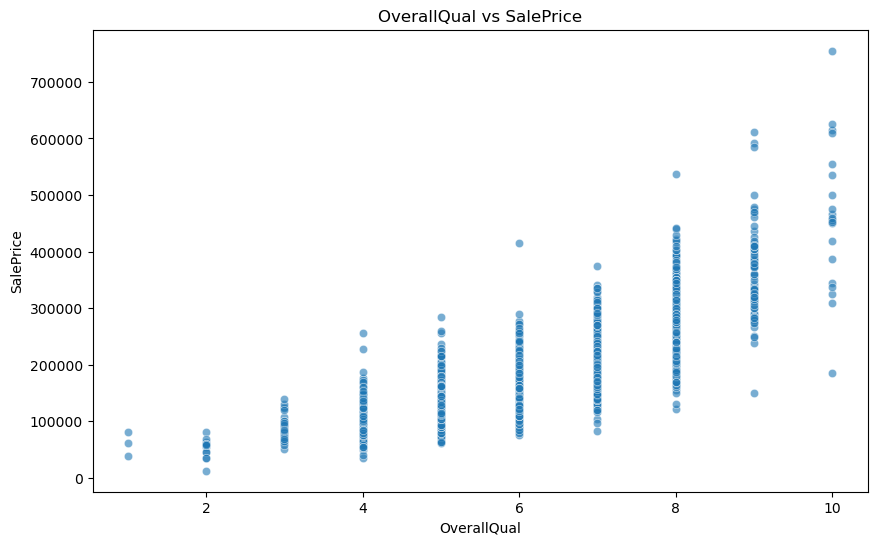

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a scatterplot of OverallQual against SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing, x='OverallQual', y='SalePrice', alpha=0.6)
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


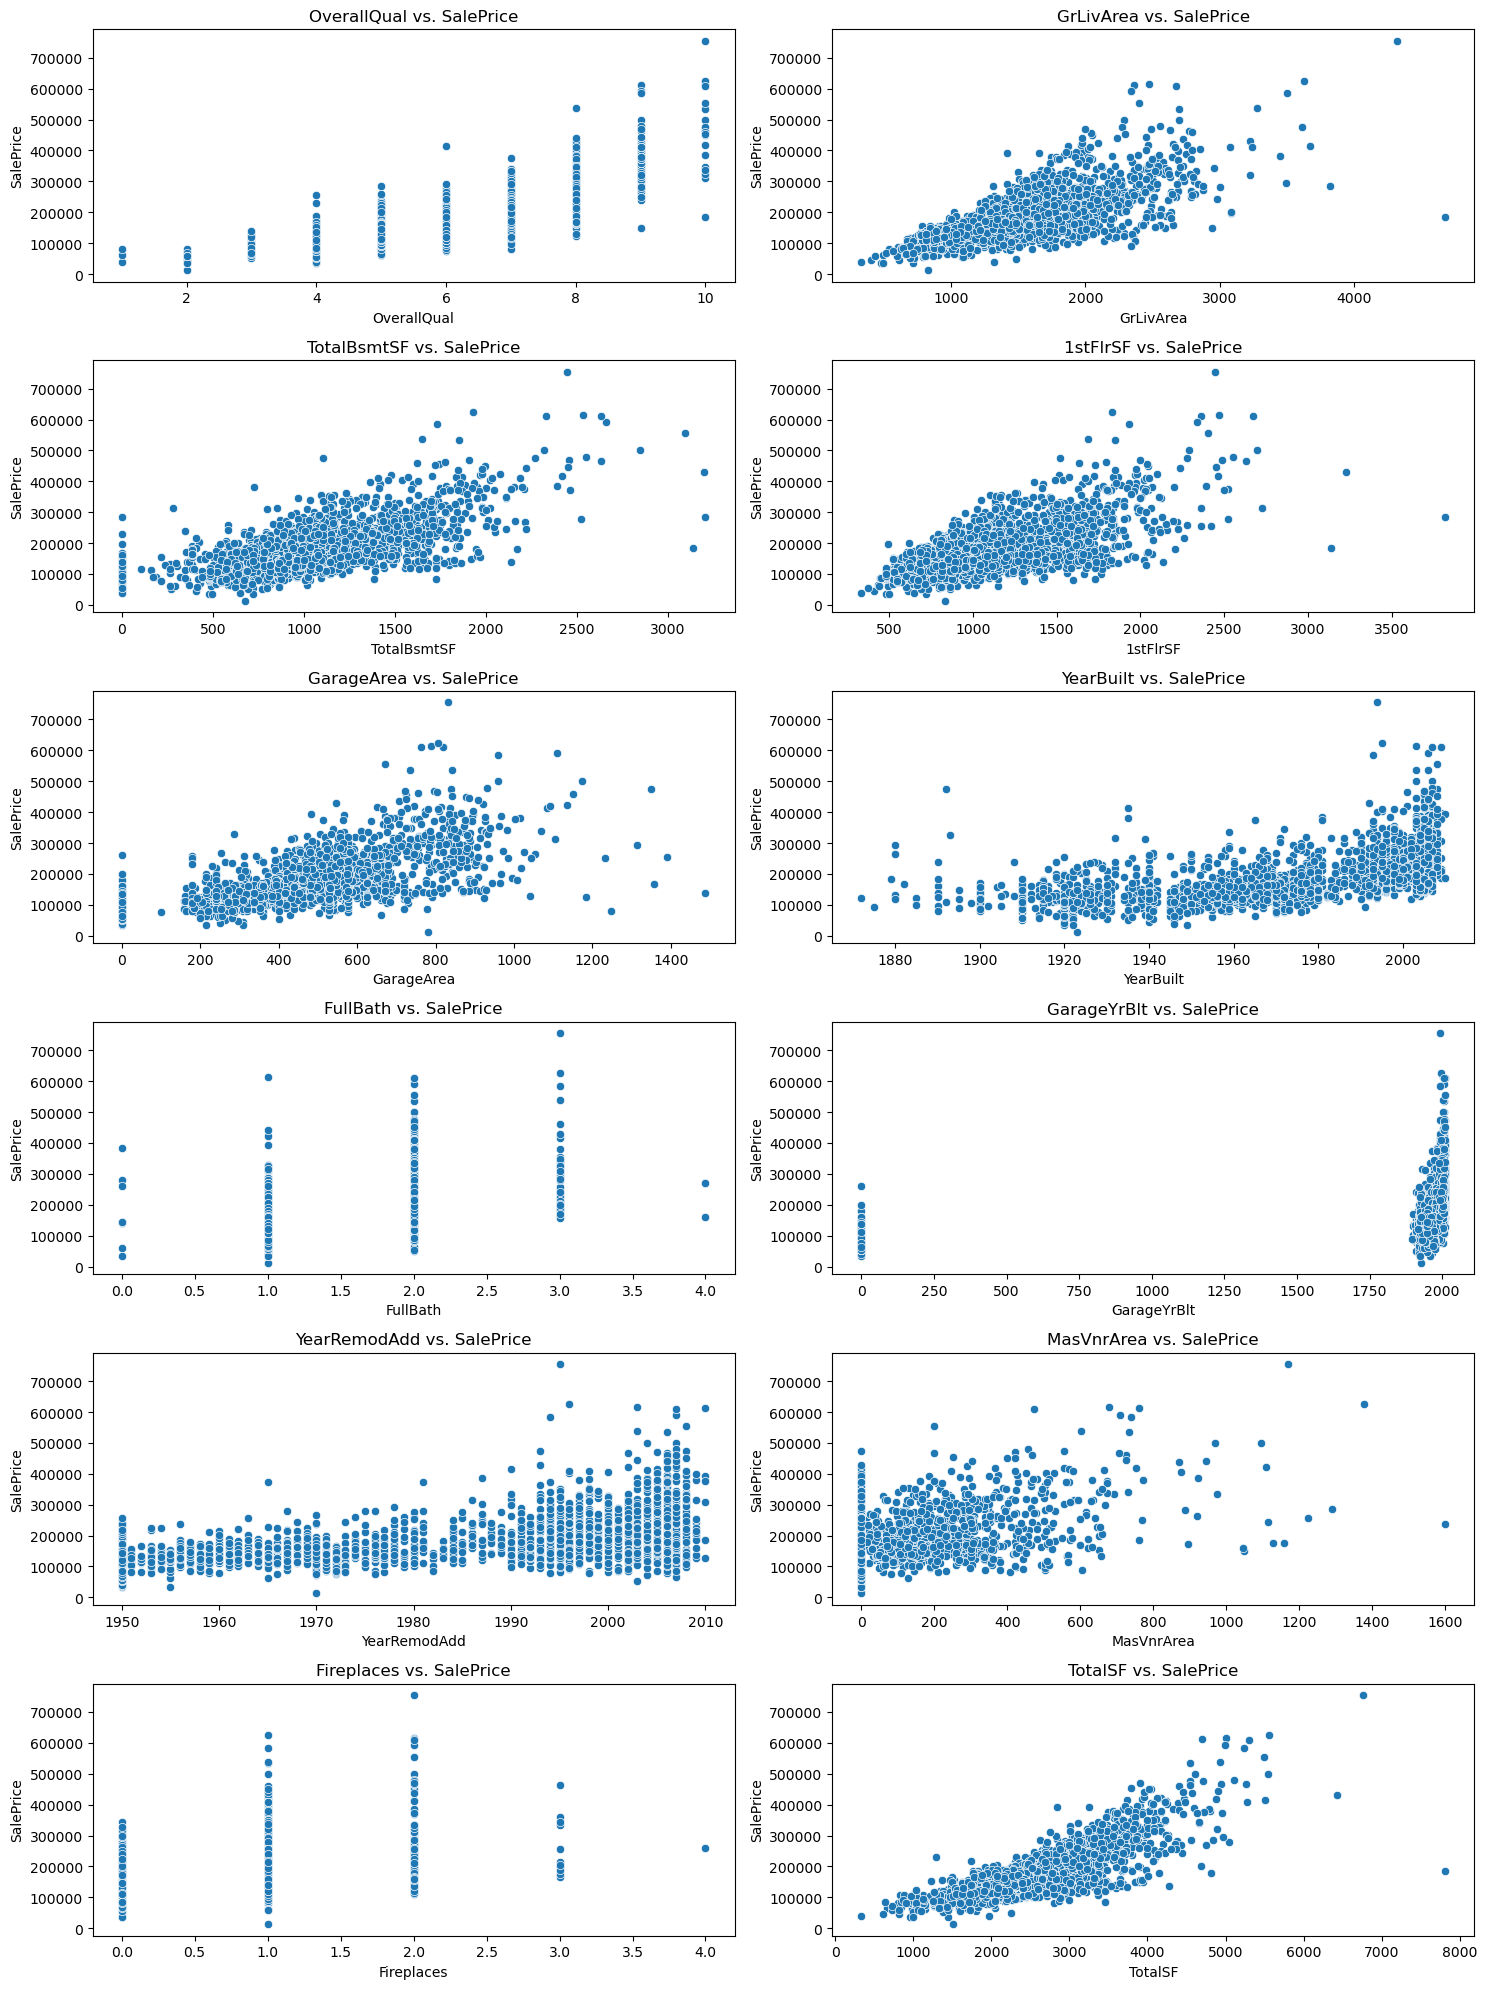

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'YearBuilt', 'FullBath', 
            'GarageYrBlt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'TotalSF']

# Set the number of columns and rows for subplots
num_cols = 2
num_rows = (len(features) + 1) // num_cols

# Create a figure and axis for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes if needed
axes = axes.flatten()

# Loop through each feature and create a scatter plot against SalePrice
for i, feature in enumerate(features):
    ax = axes[i]
    sns.scatterplot(data=housing_coordinates, x=feature, y='SalePrice', ax=ax)
    ax.set_title(f'{feature} vs. SalePrice')
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')

# Adjust layout
plt.tight_layout()
plt.show()


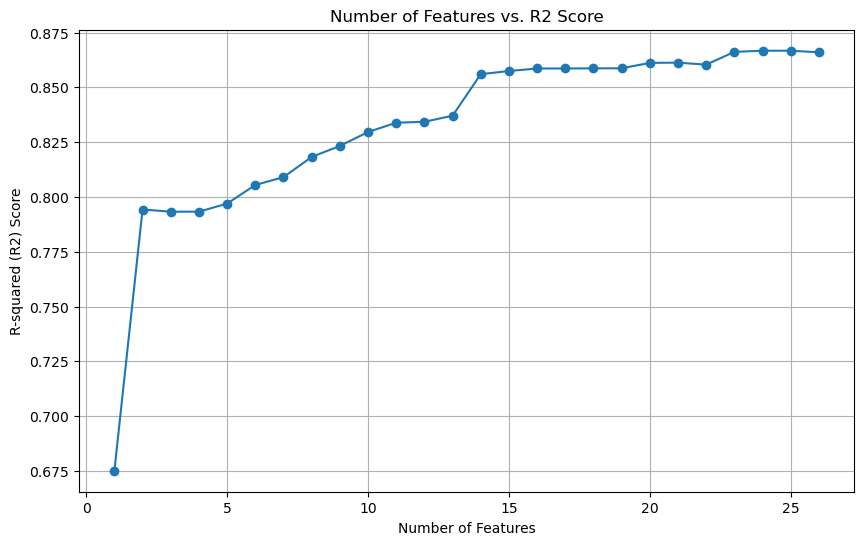

In [26]:
#Optimal number of numerical features only

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Define your target variable
y = housing_coordinates['SalePrice']

# Initialize lists to store the results
num_features = []  # Number of features
r2_scores = []     # R2 scores

# Create a loop to add one feature at a time and calculate R2
features = housing_coordinates[['TotalSF','OverallQual','GrLivArea','TotalBsmtSF','1stFlrSF',
                    'GarageCars','GarageArea','YearBuilt','FullBath','YearRemodAdd','MasVnrArea',
                    'TotRmsAbvGrd','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','OpenPorchSF',
                    'BsmtFullBath','HalfBath','LotArea','2ndFlrSF','BsmtUnfSF','BedroomAbvGr','ScreenPorch',
                    '3SsnPorch','PoolArea']]

for i in range(1, len(features.columns) + 1):
    # Select the first i features
    selected_features = features.iloc[:, :i]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.3, random_state=42)
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the R2 score and store the results
    r2 = r2_score(y_test, y_pred)
    num_features.append(i)
    r2_scores.append(r2)

# Plot the number of features vs. R2 score
plt.figure(figsize=(10, 6))
plt.plot(num_features, r2_scores, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('R-squared (R2) Score')
plt.title('Number of Features vs. R2 Score')
plt.grid(True)
plt.show()


In [27]:
###Simple linear model first. Standard scaler not applied so that the coefficients are more interpretable. 
#However, standardizing is imporant so that a feature with larger scales don't dominate the model.
#Here, 2 numeric features are used to predict SalePrice
# Kfold5 used to showcase model is stable across folds.

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecting the features 'TotalSF' and 'OverallQual'
X = housing_coordinates[['TotalSF', 'OverallQual']]
y = housing_coordinates['SalePrice']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics and coefficients for each fold
rmse_scores = []
r2_scores = []
coefficients_per_fold = []

# Perform k-fold cross-validation
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate and append RMSE and R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Append coefficients for this fold
    coefficients_per_fold.append(model.coef_)

    # Print RMSE and R^2 for this fold
    print(f"Fold {fold}: RMSE = {rmse:.4f}, R^2 = {r2:.4f}, Coefficients = {model.coef_}")
    fold += 1

# Calculate the average coefficients
average_coefficients = np.mean(coefficients_per_fold, axis=0)

# Calculate mean and standard deviation of RMSE and R^2
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print the results
print(f"\nOverall Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}")
print(f"Overall Mean R^2: {mean_r2:.4f}, Std R^2: {std_r2:.4f}")
print(f"Average Coefficients: {average_coefficients}")


Fold 1: RMSE = 36463.1977, R^2 = 0.7821, Coefficients = [   50.79018995 24560.7288304 ]
Fold 2: RMSE = 37665.4952, R^2 = 0.7729, Coefficients = [   54.61538739 23216.54722542]
Fold 3: RMSE = 34912.9368, R^2 = 0.8095, Coefficients = [   50.09440721 25177.30478221]
Fold 4: RMSE = 33202.5598, R^2 = 0.7873, Coefficients = [   51.11188577 25385.26181274]
Fold 5: RMSE = 31338.8807, R^2 = 0.7618, Coefficients = [   53.64307577 24421.10662649]

Overall Mean RMSE: 34716.6141, Std RMSE: 2257.7174
Overall Mean R^2: 0.7827, Std R^2: 0.0160
Average Coefficients: [   52.05098922 24552.18985545]


In [28]:
#Baseline lasso with all features and without alpha optimized.
#Lasso used to reduce features. There are 84 features not including PID and lasso assists with "feature selection" by
#shrinking some features to zero.

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define features and target variable
X = housing_coordinates_encoded.drop(['SalePrice'], axis=1)
y = housing_coordinates_encoded['SalePrice']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
rmse_scores = []
r2_scores = []

# Perform k-fold cross-validation
fold = 1
for train_index, test_index in kf.split(X):
    # Splitting the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and fit the Lasso model
    lasso = Lasso(alpha=100)  
    lasso.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = lasso.predict(X_test_scaled)

    # Calculate and append RMSE and R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Print RMSE and R^2 for this fold
    print(f"Fold {fold}: RMSE = {rmse:.4f}, R^2 = {r2:.4f}")
    fold += 1

# Calculate mean and standard deviation of RMSE and R^2
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print the overall results
print(f"\nOverall Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}")
print(f"Overall Mean R^2: {mean_r2:.4f}, Std R^2: {std_r2:.4f}")


Fold 1: RMSE = 23738.5057, R^2 = 0.9076
Fold 2: RMSE = 31233.9381, R^2 = 0.8438
Fold 3: RMSE = 23667.6714, R^2 = 0.9125
Fold 4: RMSE = 21092.3306, R^2 = 0.9142
Fold 5: RMSE = 23601.7698, R^2 = 0.8649

Overall Mean RMSE: 24666.8431, Std RMSE: 3432.1542
Overall Mean R^2: 0.8886, Std R^2: 0.0288


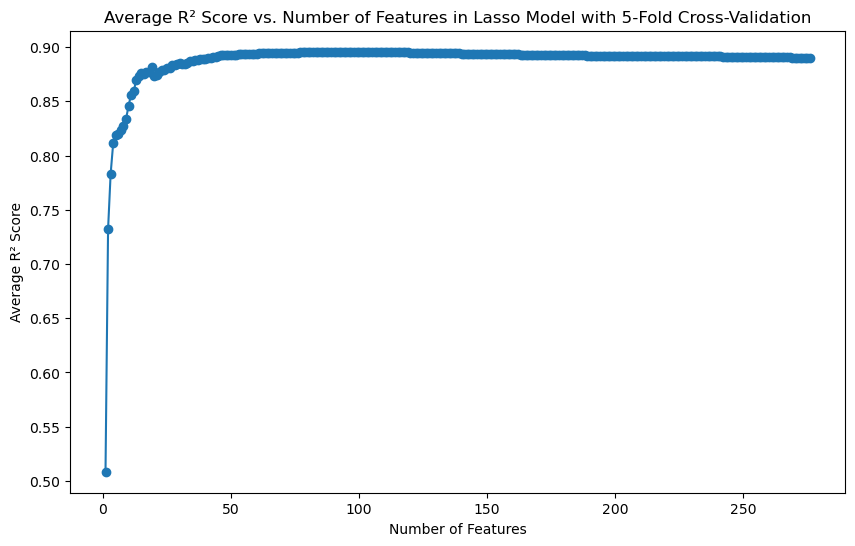

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


# Ensure all data in X is numeric
X = housing_coordinates_encoded.drop('SalePrice', axis=1)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store averaged R² scores for each number of features
num_features = []
avg_r2_scores = []

# Determine the order of feature importance
lasso = Lasso(alpha=170, max_iter=10000, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso.fit(X_scaled, y)
feature_importance = np.abs(lasso.coef_)
features = np.array(X.columns)
sorted_idx = np.argsort(feature_importance)[::-1]

# Incrementally add features
for i in range(1, len(features) + 1):
    r2_scores = []

    # Apply KFold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X_scaled[train_index][:, sorted_idx[:i]], X_scaled[test_index][:, sorted_idx[:i]]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train Lasso with the selected features
        lasso.fit(X_train, y_train)

        # Predict and calculate R² for this fold
        y_pred = lasso.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    # Store the average R² score for this number of features
    avg_r2_score = np.mean(r2_scores)
    num_features.append(i)
    avg_r2_scores.append(avg_r2_score)

# Plot average R² against the number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features, avg_r2_scores, marker='o')
plt.title('Average R² Score vs. Number of Features in Lasso Model with 5-Fold Cross-Validation')
plt.xlabel('Number of Features')
plt.ylabel('Average R² Score')
plt.show()


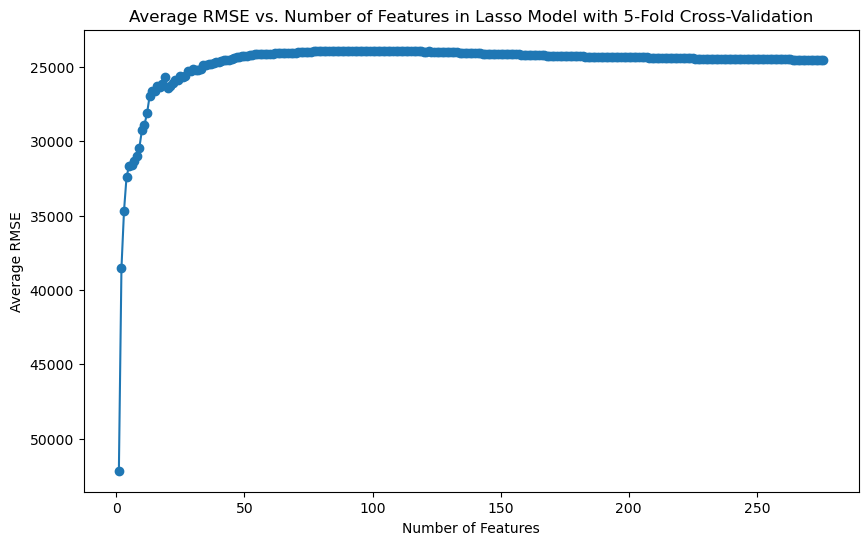

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store averaged RMSE scores for each number of features
num_features = []
avg_rmse_scores = []

# Determine the order of feature importance
lasso = Lasso(alpha=151, max_iter=10000, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso.fit(X_scaled, y)
feature_importance = np.abs(lasso.coef_)
features = np.array(X.columns)
sorted_idx = np.argsort(feature_importance)[::-1]

# Incrementally add features
for i in range(1, len(features) + 1):
    rmse_scores = []

    # Apply KFold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X_scaled[train_index][:, sorted_idx[:i]], X_scaled[test_index][:, sorted_idx[:i]]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train Lasso with the selected features
        lasso.fit(X_train, y_train)

        # Predict and calculate RMSE for this fold
        y_pred = lasso.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Store the average RMSE score for this number of features
    avg_rmse_score = np.mean(rmse_scores)
    num_features.append(i)
    avg_rmse_scores.append(avg_rmse_score)

# Plot average RMSE against the number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features, avg_rmse_scores, marker='o')
plt.title('Average RMSE vs. Number of Features in Lasso Model with 5-Fold Cross-Validation')
plt.xlabel('Number of Features')
plt.ylabel('Average RMSE')
plt.gca().invert_yaxis()  # Invert y-axis to show decreasing RMSE
plt.show()


Best alpha: 790.6043210907702


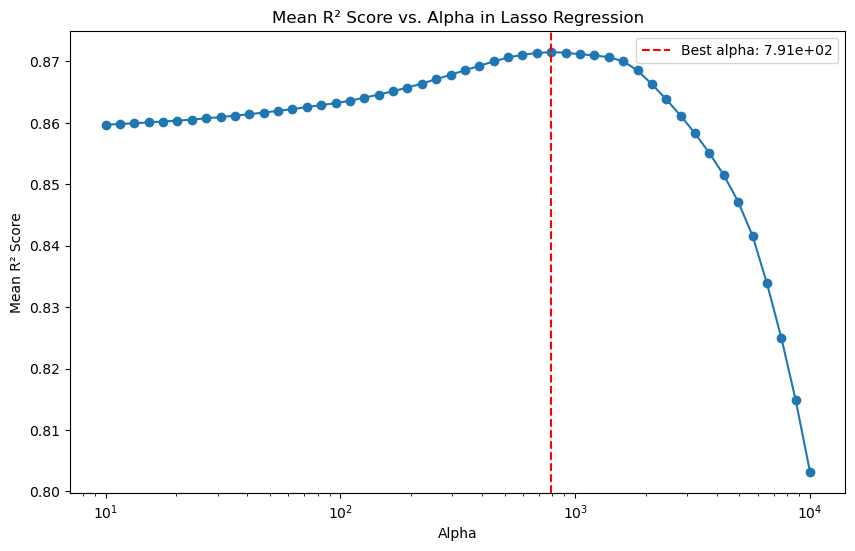

In [31]:
#Calculate best alpha with all features included and using train test split. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

X = housing_coordinates_encoded.drop('SalePrice', axis=1)
y = housing_coordinates_encoded['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values for the grid search
alpha_range = np.logspace(1, 4, 50)

# Initialize Lasso regression
lasso = Lasso(max_iter=10000, random_state=42)

# Create a GridSearchCV object with R² scoring
grid = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alpha_range), scoring='r2')

# Perform the grid search on the scaled training data
grid.fit(X_train_scaled, y_train)

# Best alpha value
best_alpha = grid.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Plotting the mean test scores (R² scores) for each alpha
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_range, grid.cv_results_['mean_test_score'], marker='o')
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best alpha: {best_alpha:.2e}')
plt.xlabel('Alpha')
plt.ylabel('Mean R² Score')
plt.title('Mean R² Score vs. Alpha in Lasso Regression')
plt.legend()
plt.show()


In [32]:
#Using the best alpha derived before, find all the features with 0 coefficients.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


X = housing_coordinates_encoded.drop('SalePrice', axis=1)
y = housing_coordinates_encoded['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Lasso model #1389 best alpha vs 790(test=0.2)
lasso = Lasso(alpha=790, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Extract the coefficients
lasso_coef = lasso.coef_

# Get the feature names
feature_names = X.columns

# Find the features where the coefficient is zero
zero_coef_features = [feature_names[i] for i in range(len(lasso_coef)) if lasso_coef[i] == 0]

# Print the number and names of features shrunk to zero
print(f"Number of features shrunk to zero: {len(zero_coef_features)}")
print("Features shrunk to zero by Lasso:")
for feature in zero_coef_features:
    print(feature)


Number of features shrunk to zero: 192
Features shrunk to zero by Lasso:
LotShape
Utilities
LandSlope
ExterCond
BsmtFinType1
BsmtFinType2
BsmtUnfSF
TotalBsmtSF
2ndFlrSF
LowQualFinSF
BsmtHalfBath
FullBath
HalfBath
TotRmsAbvGrd
FireplaceQu
GarageYrBlt
GarageQual
GarageCond
OpenPorchSF
EnclosedPorch
3SsnPorch
PoolArea
MiscVal
longitude
Age
DistanceToISU
DistanceCategory
Alley_Grvl
Alley_Pave
Alley_missing
BldgType_2fmCon
BldgType_Duplex
BldgType_TwnhsE
CentralAir_N
CentralAir_Y
Condition1_PosA
Condition1_RRAe
Condition1_RRAn
Condition1_RRNe
Condition1_RRNn
Condition2_Artery
Condition2_Feedr
Condition2_Norm
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
Electrical_FuseA
Electrical_FuseF
Electrical_FuseP
Electrical_SBrkr
Exterior1st_AsbShng
Exterior1st_AsphShn
Exterior1st_BrkComm
Exterior1st_CBlock
Exterior1st_CemntBd
Exterior1st_HdBoard
Exterior1st_ImStucc
Exterior1st_MetalSd
Exterior1st_Stucco
Exterior1st_VinylSd
Exterior1st_WdShing
Exterior2nd_AsbShng
Exterior2nd_AsphShn
Exterior2nd_Brk

In [33]:
# Extract the coefficients
lasso_coef = lasso.coef_

# Get the feature names
feature_names = X.columns

# Find the features where the coefficient is not zero
non_zero_coef_features = [feature_names[i] for i in range(len(lasso_coef)) if lasso_coef[i] != 0]

# Print the number and names of features not shrunk to zero
print(f"Number of features not shrunk to zero: {len(non_zero_coef_features)}")
print("Features not shrunk to zero by Lasso:")
for feature in non_zero_coef_features:
    print(feature)


Number of features not shrunk to zero: 84
Features not shrunk to zero by Lasso:
GrLivArea
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
ExterQual
BsmtQual
BsmtCond
BsmtExposure
BsmtFinSF1
BsmtFinSF2
HeatingQC
1stFlrSF
BsmtFullBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
Functional
Fireplaces
GarageFinish
GarageCars
GarageArea
WoodDeckSF
ScreenPorch
PoolQC
latitude
TotalSF
BldgType_1Fam
BldgType_Twnhs
Condition1_Artery
Condition1_Feedr
Condition1_Norm
Condition1_PosN
Condition2_PosA
Condition2_PosN
Exterior1st_BrkFace
Exterior1st_Plywood
Exterior1st_PreCast
Exterior1st_Wd Sdng
Exterior2nd_HdBoard
Exterior2nd_Plywood
Exterior2nd_PreCast
Exterior2nd_VinylSd
Foundation_CBlock
Foundation_PConc
Foundation_Slab
GarageType_2Types
GarageType_Basment
GarageType_missing
Heating_OthW
Heating_Wall
LandContour_Bnk
LandContour_HLS
LotConfig_CulDSac
MSSubClass_20
MSZoning_RM
MasVnrType_BrkFace
MasVnrType_None
MoSold_1
MoSold_7
MoSold_10
Neighborhood_BrkSide
Neighborhood_C

In [34]:
#What can be said of the non zero coefficient features?

# Extract original feature names
original_feature_names = set(feature.split('_')[0] for feature in non_zero_coef_features)

# Convert the set back to a list if you need it in list form
original_feature_names_list = list(original_feature_names)

print("Total features:", len(original_feature_names_list))
print(original_feature_names_list)


# Initialize lists for categorized features
categorized_nominal = []
categorized_ordinal = []
categorized_numerical = []

# Categorize each feature
for feature in original_feature_names_list:
    if feature in Nominal:
        categorized_nominal.append(feature)
    elif feature in Ordinal:
        categorized_ordinal.append(feature)
    elif feature in Numerical:
        categorized_numerical.append(feature)

# Print the categorized lists
print("\nNominal Features:", categorized_nominal)
print("\nOrdinal Features:", categorized_ordinal)
print("\nNumeric Features:", categorized_numerical)


Total features: 50
['Condition2', 'BsmtFullBath', 'TotalSF', 'ExterQual', 'Fireplaces', 'MSZoning', 'BldgType', 'MSSubClass', 'Functional', 'BsmtFinSF2', 'GarageCars', 'Exterior2nd', 'OverallQual', 'SaleType', 'KitchenQual', 'KitchenAbvGr', 'LotArea', 'LotConfig', 'BsmtCond', 'OverallCond', 'Foundation', 'MoSold', 'PoolQC', 'Heating', 'Condition1', 'RoofMatl', 'YearBuilt', 'WoodDeckSF', 'RoofStyle', 'LotFrontage', 'GarageFinish', 'latitude', 'GarageArea', 'MasVnrArea', 'SaleCondition', 'BsmtExposure', '1stFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'Neighborhood', 'MasVnrType', 'HeatingQC', 'BsmtQual', 'ScreenPorch', 'GarageType', 'Exterior1st', 'YearRemodAdd', 'Season', 'LandContour', 'GrLivArea']

Nominal Features: ['Condition2', 'MSZoning', 'BldgType', 'MSSubClass', 'Exterior2nd', 'SaleType', 'LotConfig', 'Foundation', 'MoSold', 'Heating', 'Condition1', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'Neighborhood', 'MasVnrType', 'GarageType', 'Exterior1st', 'Season', 'LandContour']

Ordinal Fe

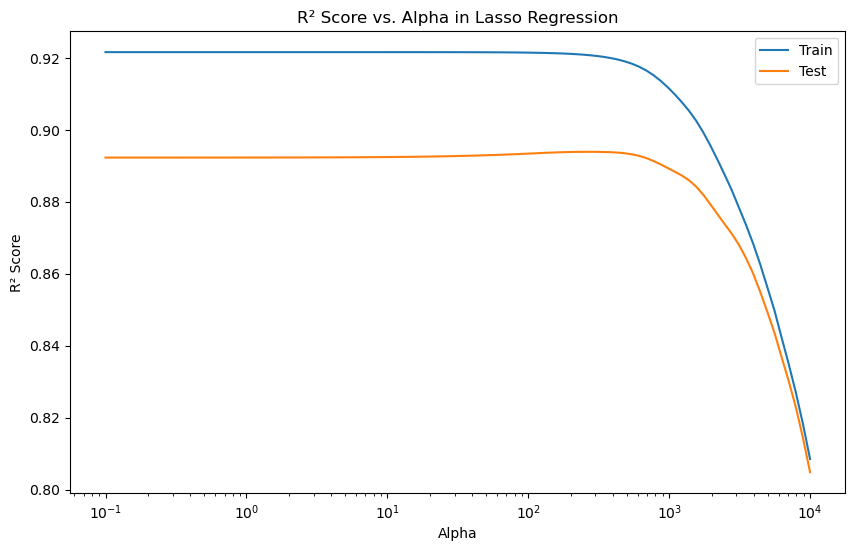

Best parameters: {'lasso__alpha': 271.85882427329403}
Best R-squared: 0.8938846210355884


In [35]:
#Calculate best alpha with kfold5 and all features

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Define feature matrix X and target y
X = housing_coordinates_encoded.drop('SalePrice', axis=1)
X = X.drop(columns=zero_coef_features, axis=1)
y = housing_coordinates_encoded['SalePrice']

# Set up the grid search with a pipeline
param_grid = {'lasso__alpha': np.logspace(-1, 4, 100)}
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

# Initialize GridSearchCV with return_train_score=True to get the training scores
grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='r2', return_train_score=True)

# Perform grid search
grid_search.fit(X, y)

# Extract the train and test scores
train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']
alphas = param_grid['lasso__alpha']

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_scores, label='Train')
plt.semilogx(alphas, test_scores, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs. Alpha in Lasso Regression')
plt.legend()
plt.show()

# Print the best parameters and best R-squared score
print("Best parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)


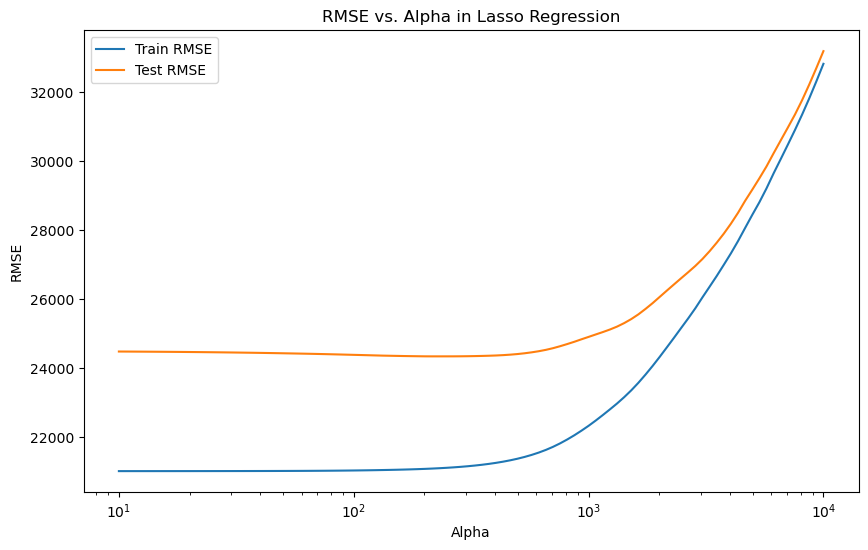

Best alpha: 215.44346900318845
Best RMSE: 24335.05552306503


In [36]:
#Best alpha for rmse with kfold5 and all features 

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np


# Define feature matrix X and target y
X = housing_coordinates_encoded.drop('SalePrice', axis=1)
X = X.drop(columns=zero_coef_features, axis=1)
y = housing_coordinates_encoded['SalePrice']

# Set up the grid search with a pipeline
param_grid = {'lasso__alpha': np.logspace(1, 4, 100)}
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

# Initialize GridSearchCV with return_train_score=True to get the training scores
grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_squared_error', return_train_score=True)

# Perform grid search
grid_search.fit(X, y)

# Extract the negative mean squared errors and convert them to RMSE
train_rmse_scores = np.sqrt(-grid_search.cv_results_['mean_train_score'])
test_rmse_scores = np.sqrt(-grid_search.cv_results_['mean_test_score'])
alphas = param_grid['lasso__alpha']

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_rmse_scores, label='Train RMSE')
plt.semilogx(alphas, test_rmse_scores, label='Test RMSE')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs. Alpha in Lasso Regression')
plt.legend()
plt.show()

# Print the best parameters and corresponding RMSE
best_alpha_index = np.argmin(test_rmse_scores)
best_alpha = alphas[best_alpha_index]
best_rmse = test_rmse_scores[best_alpha_index]
print(f"Best alpha: {best_alpha}")
print(f"Best RMSE: {best_rmse}")


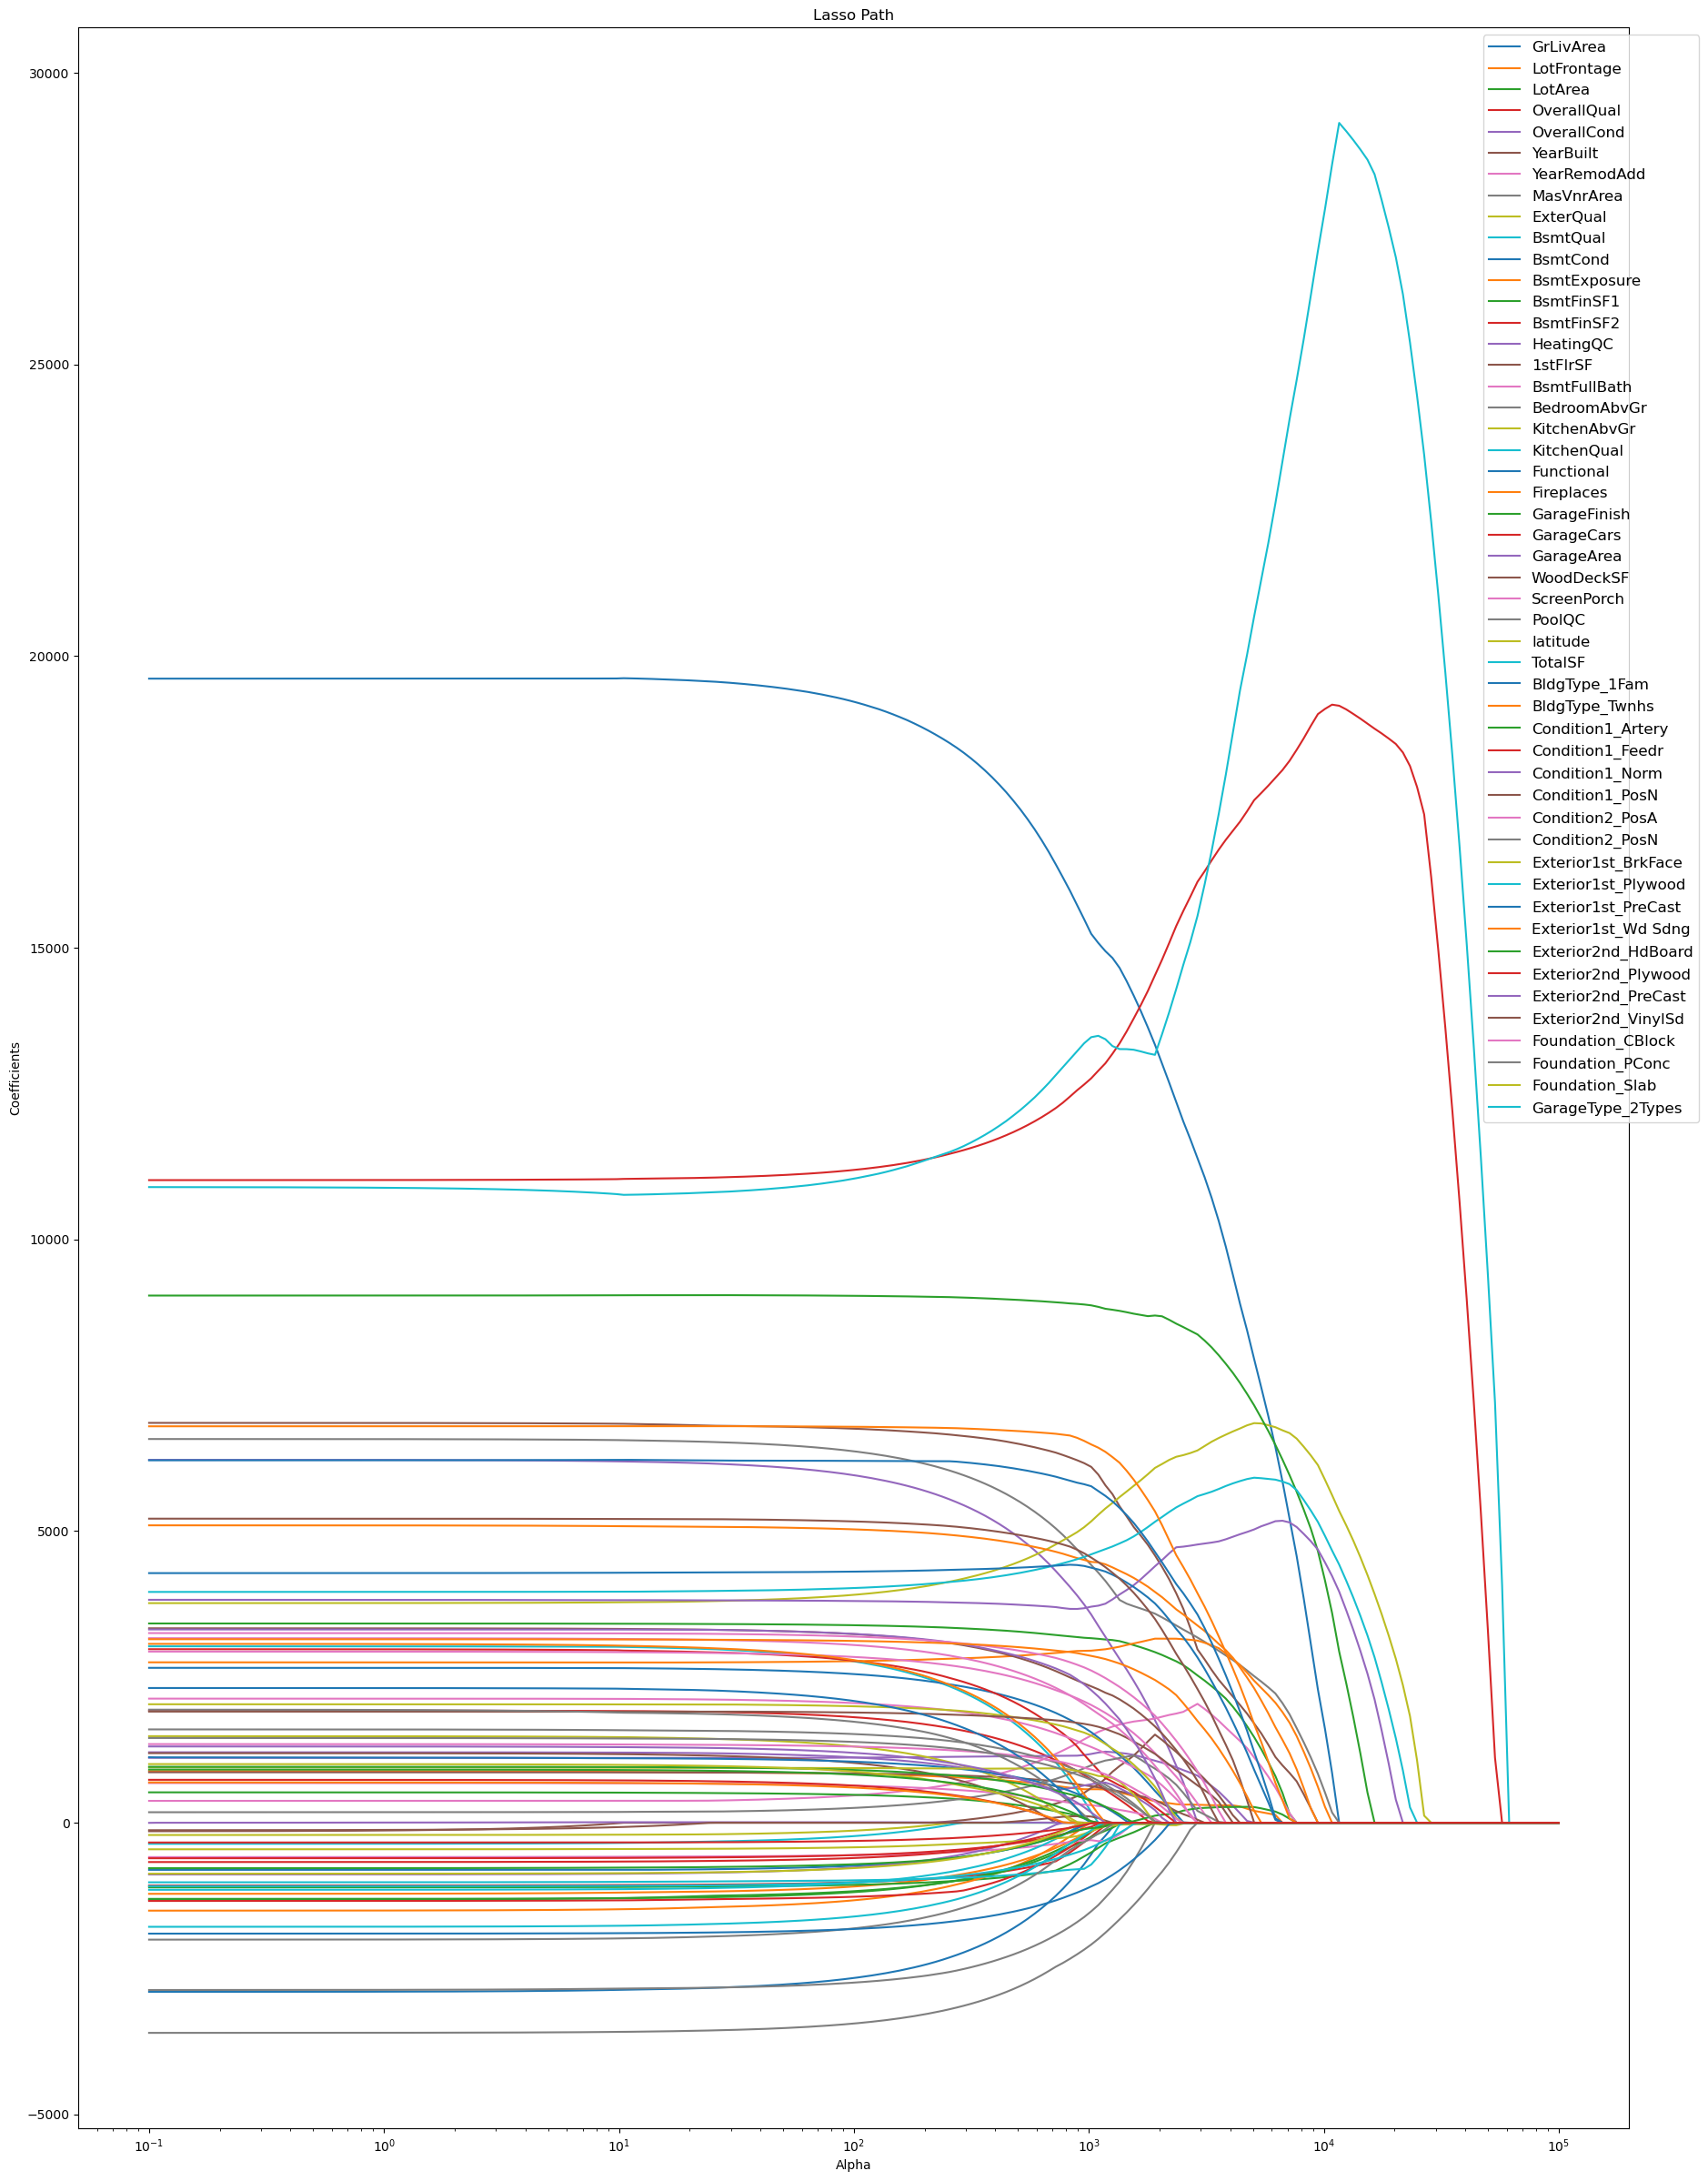

In [37]:
#All features shrink to 0 as alpha increases

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Alphas
alphas = np.logspace(-1, 5, 200)

# Store coefficients
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)

# Plotting
plt.figure(figsize=(22, 30))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Path')
plt.axis('tight')

# Only show a subset of feature names or none
plt.legend(X.columns[:50], loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='large')
plt.show()


In [38]:
#Applying best alpha with kfold5 and dropping coefficients that dropped to 0.
#Now running lasso with the best parameters (alpha) andt he most relevant features.

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Define feature matrix X and target y
X = housing_coordinates_encoded.drop('SalePrice', axis=1)
X = X.drop(columns=zero_coef_features, axis=1)
y = housing_coordinates_encoded['SalePrice']

# Initialize the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a StandardScaler
scaler = StandardScaler()

# Initialize Lasso with the specified alpha #120 alpha vs best alpha 271
lasso = Lasso(alpha=271, random_state=42)

# Lists to store RMSE and R2 scores for each fold
rmse_scores = []
r2_scores = []

# KFold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scaling features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit Lasso model
    lasso.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = lasso.predict(X_test_scaled)

    # Calculate RMSE and R2 for this fold and store them
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Print RMSE and R2 for each fold
    print(f"Fold {train_index}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

# Calculate and print the mean RMSE and R2 across all folds
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print(f"\nMean RMSE: {mean_rmse:.4f}")
print(f"Mean R2: {mean_r2:.4f}")


Fold [   0    1    2 ... 2575 2576 2578]: RMSE = 24023.7239, R2 = 0.9054
Fold [   0    1    2 ... 2573 2575 2577]: RMSE = 30167.8264, R2 = 0.8543
Fold [   0    1    3 ... 2576 2577 2578]: RMSE = 23433.9771, R2 = 0.9142
Fold [   1    2    4 ... 2576 2577 2578]: RMSE = 20003.4124, R2 = 0.9228
Fold [   0    2    3 ... 2576 2577 2578]: RMSE = 22905.8502, R2 = 0.8727

Mean RMSE: 24106.9580
Mean R2: 0.8939


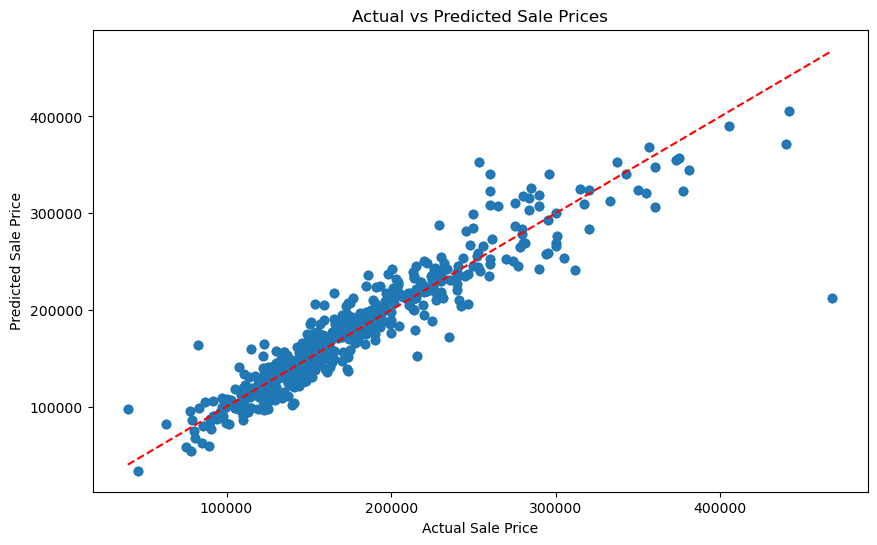

In [39]:
#Can the model be further improved?

import matplotlib.pyplot as plt

# [Your existing imports and setup code]

# Lists to store overall predicted and actual values
all_y_pred = []
all_y_actual = []

# KFold cross-validation with visualization code added
for train_index, test_index in kf.split(X):
    # [Your existing code for splitting data, scaling, fitting Lasso model]

    # Append predicted and actual values for this fold
    all_y_pred.extend(y_pred)
    all_y_actual.extend(y_test.values)

    # [Your existing code for calculating and printing RMSE, R2 for each fold]

# [Your existing code to calculate and print mean RMSE, R2]

# Visualization of Predicted vs Actual Sale Prices
plt.figure(figsize=(10, 6))
plt.scatter(all_y_actual, all_y_pred, alpha=0.5)
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot([min(all_y_actual), max(all_y_actual)], [min(all_y_actual), max(all_y_actual)], color='red', linestyle='--')
plt.show()


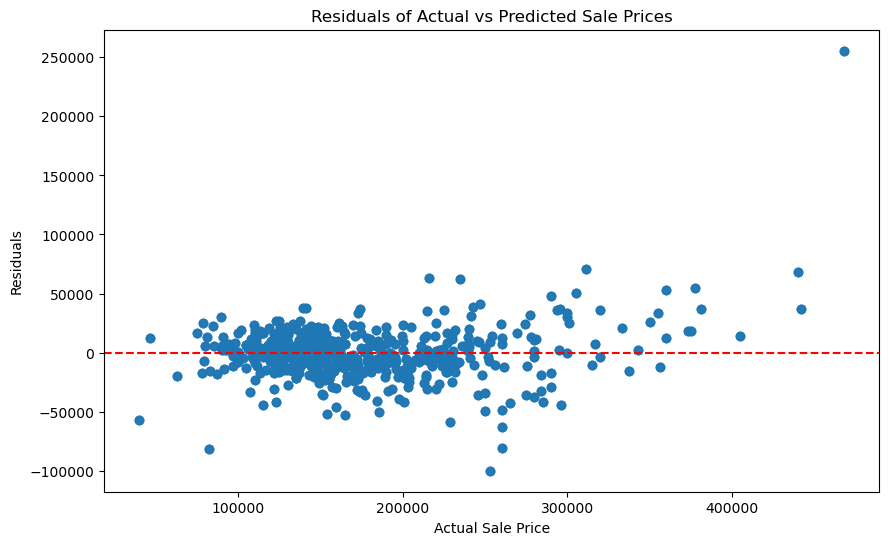

In [40]:
import matplotlib.pyplot as plt

# [Your existing imports and setup code]

# Lists to store overall predicted values, actual values, and residuals
all_y_pred = []
all_y_actual = []
residuals = []

# KFold cross-validation with residual calculation
for train_index, test_index in kf.split(X):
    # [Your existing code for splitting data, scaling, fitting Lasso model]

    # Append predicted and actual values for this fold
    all_y_pred.extend(y_pred)
    all_y_actual.extend(y_test.values)

    # Calculate and store residuals for this fold
    residuals.extend(y_test.values - y_pred)

    # [Your existing code for calculating and printing RMSE, R2 for each fold]

# [Your existing code to calculate and print mean RMSE, R2]

# Visualization of Residuals
plt.figure(figsize=(10, 6))
plt.scatter(all_y_actual, residuals, alpha=0.5)
plt.title('Residuals of Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [41]:
#Removing outliers

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


X_full = housing_coordinates_encoded.drop('SalePrice', axis=1)
X_full = X_full.drop(zero_coef_features, axis=1)
y_full = housing_coordinates_encoded['SalePrice']

# Scale features for the entire dataset
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Create and fit the Lasso model for the entire dataset
lasso_full = Lasso(alpha=171.0, random_state=42)
lasso_full.fit(X_full_scaled, y_full)

# Make predictions for the entire dataset
y_pred_full = lasso_full.predict(X_full_scaled)

# Calculate residuals for the entire dataset
residuals_full = y_full - y_pred_full

# Create a DataFrame for analysis with the entire dataset
results_df = housing_coordinates_encoded.copy()
results_df['PredictedSalePrice'] = y_pred_full
results_df['Residuals'] = residuals_full


# Filter rows where absolute value of residuals is greater than 40,000
outlier_rows = results_df[abs(results_df['Residuals']) > 40000]

# Remove outliers based on residuals
housing_cleaned = results_df[abs(results_df['Residuals']) <= 40000]

# Define feature matrix X and target y for the cleaned dataset
X_cleaned = housing_cleaned.drop(['SalePrice', 'PredictedSalePrice', 'Residuals'], axis=1)
X_cleaned = X_cleaned.drop(zero_coef_features, axis=1)
y_cleaned = housing_cleaned['SalePrice']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Lists to store metrics for each fold
rmse_scores = []
r2_scores = []

# KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_cleaned)):
    # Splitting the data
    X_train, X_test = X_cleaned.iloc[train_index], X_cleaned.iloc[test_index]
    y_train, y_test = y_cleaned.iloc[train_index], y_cleaned.iloc[test_index]

    # Scale features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and fit the Lasso model
    lasso = Lasso(alpha=171.0, random_state=42)  #best alpha from gridsearch
    lasso.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = lasso.predict(X_test_scaled)

    # Calculate RMSE and R² for the fold
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store the metrics
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Print metrics for each fold
    print(f"Fold {fold+1} - RMSE: {rmse}, R²: {r2}")

# Calculate mean RMSE and R²
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)

# Print the average results
print(f"\nAverage RMSE: {mean_rmse}")
print(f"Average R²: {mean_r2}")


Fold 1 - RMSE: 16348.515467636225, R²: 0.9402952304938392
Fold 2 - RMSE: 14747.920007201785, R²: 0.951559784682583
Fold 3 - RMSE: 14850.92255010987, R²: 0.9456370658839945
Fold 4 - RMSE: 15189.378799891254, R²: 0.9463920791679042
Fold 5 - RMSE: 16280.960536603103, R²: 0.9370431448437773

Average RMSE: 15483.539472288447
Average R²: 0.9441854610144196


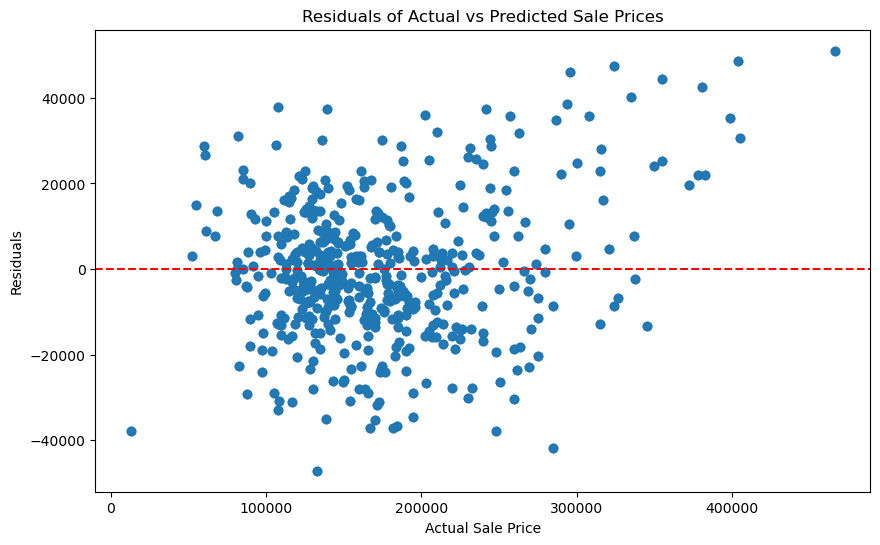

In [42]:
#New residuals with outliers removed

import matplotlib.pyplot as plt


# Lists to store overall predicted values, actual values, and residuals
all_y_pred = []
all_y_actual = []
residuals = []

# KFold cross-validation with residual calculation
for train_index, test_index in kf.split(X):
    # [Your existing code for splitting data, scaling, fitting Lasso model]

    # Append predicted and actual values for this fold
    all_y_pred.extend(y_pred)
    all_y_actual.extend(y_test.values)

    # Calculate and store residuals for this fold
    residuals.extend(y_test.values - y_pred)


# Visualization of Residuals
plt.figure(figsize=(10, 6))
plt.scatter(all_y_actual, residuals, alpha=0.5)
plt.title('Residuals of Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [43]:
#These rows could be important. Which houses were oversold and undersold and by how much?

outlier_rows

,GrLivArea,SalePrice,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,Season_Fall,Season_Spring,Season_Summer,Season_Winter,PredictedSalePrice,Residuals
7,936,93000,60.000000,6000,4,3,2,4,4,1953,...,0,0,1,0,0,0,0,1,52915.923399,40084.076601
30,2046,450000,105.000000,15431,4,3,1,10,5,2005,...,1,0,0,0,0,0,1,0,396918.451369,53081.548631
61,1973,395000,110.000000,14226,4,3,1,8,5,2006,...,1,0,0,0,0,0,1,0,328657.800636,66342.199364
70,2470,615000,106.000000,12720,4,3,2,10,5,2003,...,0,1,0,0,0,0,0,1,503603.429110,111396.570890
78,1652,392500,64.000000,5587,3,3,2,8,5,2008,...,0,1,0,0,1,0,0,0,303773.832065,88726.167935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,1713,274900,76.000000,9591,4,3,1,8,5,2004,...,0,0,1,0,0,0,0,1,324084.924276,-49184.924276
2540,2296,451950,97.000000,13478,3,3,1,10,5,2008,...,0,0,1,0,0,0,1,0,386464.312938,65485.687062
2541,1557,234000,68.363763,3196,4,3,1,7,5,2003,...,0,0,0,0,1,0,0,0,187694.789097,46305.210903
2582,1509,159900,68.000000,9571,4,3,1,5,6,1956,...,0,1,0,0,0,0,1,0,205782.980909,-45882.980909


In [44]:
#Multiple linear regression using all non zero features from lasso. Standard scaler not used.

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# List of nominal and ordinal features
nominal_features = categorized_nominal
ordinal_features = categorized_ordinal

# Dummify nominal features and assign to X
X = pd.get_dummies(housing_coordinates, columns=nominal_features, drop_first=True)

# Generate a list of the new dummified column names
dummified_columns = [col for col in X.columns if any(nom in col for nom in nominal_features)]

# List of original non-dummified features
numeric_features = categorized_numerical

# Combine original features with dummified column names
combined_features = numeric_features + dummified_columns + ordinal_features

# Now select X and y using these features
X = X[combined_features]
y = housing_coordinates['SalePrice']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores and coefficients
rmse_scores = []
r2_scores = []
coefficients_per_fold = []

# Perform KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store coefficients for this fold
    coefficients_per_fold.append(model.coef_)

    # Predict and calculate metrics
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Print RMSE and R2 for each fold
    print(f"Fold {fold + 1}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

# Calculate and print the average RMSE and R²
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print(f"\nAverage RMSE: {mean_rmse:.4f}")
print(f"Average R²: {mean_r2:.4f}")

# Calculate the average and average absolute coefficients across all folds
average_coefficients = np.mean(coefficients_per_fold, axis=0)
average_absolute_coefficients = np.mean(np.abs(coefficients_per_fold), axis=0)

# Create DataFrames for the average and average absolute coefficients
feature_names = X.columns
average_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Average Coefficient': average_coefficients})
average_abs_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Average Absolute Coefficient': average_absolute_coefficients})

# Print the average and average absolute coefficients
print("\nAverage Coefficients per Feature:")
print(average_coefficients_df.head(50))

print("\nAverage Absolute Coefficients per Feature:")
print(average_abs_coefficients_df.head(50))


Fold 1: RMSE = 24096.8049, R2 = 0.9048
Fold 2: RMSE = 31304.1589, R2 = 0.8431
Fold 3: RMSE = 23410.1369, R2 = 0.9144
Fold 4: RMSE = 20454.2149, R2 = 0.9193
Fold 5: RMSE = 24132.3476, R2 = 0.8587

Average RMSE: 24679.5326
Average R²: 0.8881

Average Coefficients per Feature:
             Feature  Average Coefficient
0       BsmtFullBath          1469.538206
1            TotalSF            12.009104
2         Fireplaces          3628.360864
3         BsmtFinSF2            12.296027
4         GarageCars          3732.374740
5        OverallQual          8060.674400
6       KitchenAbvGr         -4744.222175
7            LotArea             0.428895
8        OverallCond          5475.139812
9          YearBuilt           335.387980
10        WoodDeckSF             5.778299
11       LotFrontage            36.064677
12          latitude        118836.520327
13        GarageArea            14.309690
14        MasVnrArea            35.780641
15          1stFlrSF            -3.413384
16      Bed

In [46]:
#Rerun linear model with a subset of non zero coefficient features. Not all improve r2

keep=['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',  'MasVnrArea','ExterQual',
      'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BedroomAbvGr', 'KitchenQual', 'Functional',  
      'Fireplaces','GarageArea','ScreenPorch', 'TotalSF', 'BldgType',  'Exterior1st',  'Heating', 'LandContour', 
      'LotConfig',  'MSSubClass', 'MasVnrType', 'Neighborhood', 'RoofMatl', 'SaleCondition']

toss=['Season', 'SaleType', 'RoofStyle', 'MoSold','MSZoning','GarageType','Foundation', 'Condition1', 'latitude', 
      'PoolQC', 'WoodDeckSF', 'GarageCars', 'GarageFinish', 'KitchenAbvGr', 'BsmtFullBath', '1stFlrSF','HeatingQC',
      'YearRemodAdd', 'LotFrontage']

In [47]:
#Rerun linear model again with some features removed that don't seem to contribute to the linear model

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# List of nominal and ordinal features
nominal_features = ['MSSubClass', 'Neighborhood', 'RoofMatl', 'SaleCondition', 'Exterior1st', 'Heating', 'BldgType',
                    'LotConfig', 'LandContour']
ordinal_features = ['ExterQual', 'BsmtExposure', 'Functional', 'BsmtQual', 'KitchenQual', 'BsmtCond']

# Dummify nominal features and assign to X
X = pd.get_dummies(housing_coordinates, columns=nominal_features, drop_first=True)

# Generate a list of the new dummified column names
dummified_columns = [col for col in X.columns if any(nom in col for nom in nominal_features)]

# List of original non-dummified features
numeric_features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF2', 'BedroomAbvGr', 
                     'OverallCond', 'ScreenPorch', 'TotalSF', 'BsmtFinSF1', 'GarageArea', 'LotArea', 'Fireplaces']

# Combine original features with dummified column names
combined_features = numeric_features + dummified_columns + ordinal_features

# Now select X and y using these features
X = X[combined_features]
y = housing_coordinates['SalePrice']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores and coefficients
rmse_scores = []
r2_scores = []
coefficients_per_fold = []

# Perform KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store coefficients for this fold
    coefficients_per_fold.append(model.coef_)

    # Predict and calculate metrics
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Print RMSE and R2 for each fold
    print(f"Fold {fold + 1}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

# Calculate and print the average RMSE and R²
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print(f"\nAverage RMSE: {mean_rmse:.4f}")
print(f"Average R²: {mean_r2:.4f}")

# Calculate the average and average absolute coefficients across all folds
average_coefficients = np.mean(coefficients_per_fold, axis=0)
average_absolute_coefficients = np.mean(np.abs(coefficients_per_fold), axis=0)

# Create DataFrames for the average and average absolute coefficients
feature_names = X.columns
average_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Average Coefficient': average_coefficients})
average_abs_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Average Absolute Coefficient': average_absolute_coefficients})

# Print the average and average absolute coefficients
print("\nAverage Coefficients per Feature:")
print(average_coefficients_df.head(50))

print("\nAverage Absolute Coefficients per Feature:")
print(average_abs_coefficients_df.head(50))


Fold 1: RMSE = 23920.6205, R2 = 0.9062
Fold 2: RMSE = 29075.0575, R2 = 0.8647
Fold 3: RMSE = 23368.4104, R2 = 0.9147
Fold 4: RMSE = 20969.0626, R2 = 0.9152
Fold 5: RMSE = 20453.0635, R2 = 0.8985

Average RMSE: 23557.2429
Average R²: 0.8998

Average Coefficients per Feature:
                 Feature  Average Coefficient
0              GrLivArea            46.937017
1            OverallQual          8301.053964
2              YearBuilt           340.739547
3             MasVnrArea            26.219760
4             BsmtFinSF2            13.628012
5           BedroomAbvGr         -4102.915192
6            OverallCond          5685.097872
7            ScreenPorch            42.116432
8                TotalSF            10.730158
9             BsmtFinSF1            22.647220
10            GarageArea            18.689236
11               LotArea             0.418925
12            Fireplaces          4004.975001
13             HeatingQC          1580.097753
14         MSSubClass_30          5

In [48]:
#Removing same outlier as before in lasso model. R2 improve

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract indices of the outlier rows
outlier_indices = outlier_rows.index

# Remove the outliers from the dataset
housing_coordinates_cleaned = housing_coordinates.drop(outlier_indices)

# List of nominal and ordinal features
nominal_features = ['MSSubClass', 'Neighborhood', 'RoofMatl', 'SaleCondition', 'Exterior1st', 'Heating', 'BldgType',
                    'LotConfig', 'LandContour']
ordinal_features = ['ExterQual', 'BsmtExposure', 'Functional', 'BsmtQual', 'KitchenQual', 'BsmtCond']

# Dummify nominal features and assign to X
X = pd.get_dummies(housing_coordinates_cleaned, columns=nominal_features, drop_first=True)

# Generate a list of the new dummified column names
dummified_columns = [col for col in X.columns if any(nom in col for nom in nominal_features)]

# List of original non-dummified features
numeric_features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF2', 'BedroomAbvGr', 
                     'OverallCond', 'ScreenPorch', 'TotalSF', 'BsmtFinSF1', 'GarageArea', 'LotArea', 'Fireplaces']

# Combine original features with dummified column names
combined_features = numeric_features + dummified_columns + ordinal_features

# Now select X and y using these features
X = X[combined_features]
y = housing_coordinates_cleaned['SalePrice']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store scores and coefficients
rmse_scores = []
r2_scores = []
coefficients_per_fold = []

# Perform KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store coefficients for this fold
    coefficients_per_fold.append(model.coef_)

    # Predict and calculate metrics
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Print RMSE and R2 for each fold
    print(f"Fold {fold + 1}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

# Calculate and print the average RMSE and R²
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
print(f"\nAverage RMSE: {mean_rmse:.4f}")
print(f"Average R²: {mean_r2:.4f}")

# Calculate the average and average absolute coefficients across all folds
average_coefficients = np.mean(coefficients_per_fold, axis=0)
average_absolute_coefficients = np.mean(np.abs(coefficients_per_fold), axis=0)

# Create DataFrames for the average and average absolute coefficients
feature_names = X.columns
average_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Average Coefficient': average_coefficients})
average_abs_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Average Absolute Coefficient': average_absolute_coefficients})

# Print the average and average absolute coefficients
print("\nAverage Coefficients per Feature:")
print(average_coefficients_df.head(50))

print("\nAverage Absolute Coefficients per Feature:")
print(average_abs_coefficients_df.head(50))


Fold 1: RMSE = 16510.9279, R2 = 0.9391
Fold 2: RMSE = 15085.4192, R2 = 0.9493
Fold 3: RMSE = 15496.9975, R2 = 0.9408
Fold 4: RMSE = 16179.6669, R2 = 0.9392
Fold 5: RMSE = 16788.9431, R2 = 0.9331

Average RMSE: 16012.3909
Average R²: 0.9403

Average Coefficients per Feature:
                 Feature  Average Coefficient
0              GrLivArea            47.326946
1            OverallQual          8004.122468
2              YearBuilt           359.111089
3             MasVnrArea            21.307342
4             BsmtFinSF2             9.538167
5           BedroomAbvGr         -5003.002423
6            OverallCond          5450.969043
7            ScreenPorch            24.280998
8                TotalSF            11.755731
9             BsmtFinSF1            20.695211
10            GarageArea            18.654225
11               LotArea             0.576059
12            Fireplaces          2736.805119
13             HeatingQC          1486.802328
14         MSSubClass_30          2

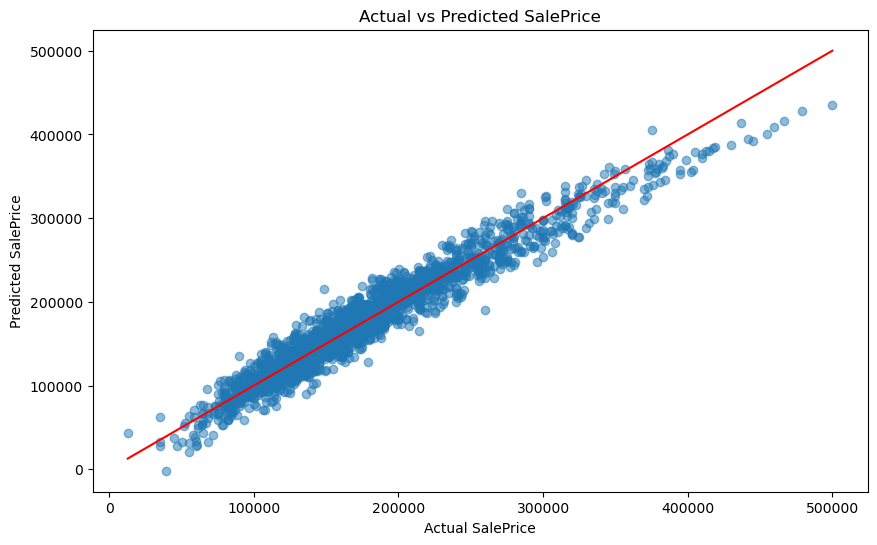

In [49]:
import matplotlib.pyplot as plt

# Initialize lists to store actual and predicted values
actual_values = []
predicted_values = []

# Continue with your existing K-Fold cross-validation loop
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Store actual and predicted values
    actual_values.extend(y_test)
    predicted_values.extend(y_pred)

    # [Rest of your existing code here...]

# Now plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r')  # 45-degree line
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()


In [51]:
#Examine the coefficients across the five folds. Some are neg and some are positive across different folds which makes it
#harder to interpret

# Recreate the DataFrame for coefficients using X.columns as column names
coefficients_df = pd.DataFrame(coefficients_per_fold, columns=X.columns)

# Transpose the DataFrame to have features as rows and folds as columns
coefficients_df_transposed = coefficients_df.T

# Rename the columns to indicate fold numbers
coefficients_df_transposed.columns = [f"Fold {i+1}" for i in range(coefficients_df_transposed.shape[1])]

# Print the transposed DataFrame with all rows visible
pd.set_option('display.max_rows', None)
# Set display option to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Print the transposed DataFrame with all rows and columns visible
print("Coefficients for each feature across the 5 folds (transposed):")
print(coefficients_df_transposed)



Coefficients for each feature across the 5 folds (transposed):
                             Fold 1        Fold 2        Fold 3        Fold 4        Fold 5
GrLivArea              4.758455e+01  4.385989e+01  5.019827e+01  4.734376e+01  4.764826e+01
OverallQual            8.473811e+03  7.833666e+03  7.850356e+03  7.877958e+03  7.984821e+03
YearBuilt              3.401589e+02  3.760447e+02  3.549354e+02  3.429656e+02  3.814508e+02
MasVnrArea             2.084710e+01  2.174432e+01  2.111532e+01  2.189066e+01  2.093931e+01
BsmtFinSF2             8.251783e+00  8.563154e+00  9.698413e+00  1.050399e+01  1.067349e+01
BedroomAbvGr          -4.369151e+03 -5.409993e+03 -5.494432e+03 -4.632171e+03 -5.109265e+03
OverallCond            5.499446e+03  5.435426e+03  5.103945e+03  5.908349e+03  5.307679e+03
ScreenPorch            1.998941e+01  2.297967e+01  2.774065e+01  2.707088e+01  2.362438e+01
TotalSF                1.093110e+01  1.389102e+01  9.787371e+00  1.194343e+01  1.222573e+01
BsmtFinSF1       

In [52]:
# Features with mixed +/- coefficient signs

signs_df = coefficients_df.apply(np.sign)

# Identify features with mixed signs
mixed_sign_features = []
for feature in signs_df.columns:
    # Check if the feature has both positive and negative signs across folds
    if len(signs_df[feature].unique()) > 1:
        mixed_sign_features.append(feature)

# Print the list of features with mixed signs
mixed_sign_features


['MSSubClass_45',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_150',
 'Neighborhood_Blueste',
 'Neighborhood_BrkSide',
 'Neighborhood_MeadowV',
 'RoofMatl_Membran',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'SaleCondition_AdjLand',
 'SaleCondition_Family',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_Plywood',
 'Exterior1st_PreCast',
 'Exterior1st_WdShing',
 'Heating_GasA',
 'Heating_GasW',
 'BldgType_2fmCon',
 'BldgType_Twnhs',
 'LandContour_Low']

In [61]:
#Determine colliniearity among numeric features

from statsmodels.stats.outliers_influence import variance_inflation_factor


np.random.seed(0)
X_numeric = pd.DataFrame(np.random.rand(100, len(numeric_features)), columns=numeric_features)

# Function to calculate VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# Calculate VIF for the specified numeric features
vif_df_numeric = calculate_vif(X_numeric)
vif_df_numeric



,feature,VIF
0,GrLivArea,4.011584
1,OverallQual,3.429460
2,YearBuilt,4.142187
3,MasVnrArea,4.325519
4,BsmtFinSF2,4.468339
5,BedroomAbvGr,5.563408
6,OverallCond,5.189912
7,ScreenPorch,3.570955
8,TotalSF,4.887736
9,BsmtFinSF1,3.779931
